# Question 1



In [34]:
import pandas as pd
users = pd.read_csv(r'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user',sep='|')
users.head()
users
print("The average age per occcupation is: ")
users[["occupation","age"]].groupby("occupation").mean()

The average age per occcupation is: 


,age
occupation,
administrator,38.746835
artist,31.392857
doctor,43.571429
educator,42.010526
engineer,36.388060
entertainment,29.222222
executive,38.718750
healthcare,41.562500
homemaker,32.571429


In [36]:
users.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [55]:
#male ratio
print("The male ratio per occcupation is: ")
user_df=pd.DataFrame(users)
user_df
result = user_df.pivot_table(index='occupation', columns='gender', aggfunc='size', fill_value=0)

sum_sex = result[['F', 'M']].sum(axis=1)

result['MaleRatio'] = result['M'] / sum_sex*100
result.sort_values('MaleRatio',axis=0,ascending=False)


#reference https://stackoverflow.com/questions/51010770/how-to-find-the-ratio-in-a-pandas-series-for-a-groupby-function


The male ratio per occcupation is: 


gender,F,M,MaleRatio
occupation,,,
doctor,0,7,100.000000
engineer,2,65,97.014925
technician,1,26,96.296296
retired,1,13,92.857143
programmer,6,60,90.909091
executive,3,29,90.625000
scientist,3,28,90.322581
entertainment,2,16,88.888889
lawyer,2,10,83.333333


In [41]:
 # For each occupation, calculating the maximum age and maximum age
user_df.groupby("occupation").agg({'age': [ 'min', 'max']})
#https://www.geeksforgeeks.org/pandas-groupby-one-column-and-get-mean-min-and-max-values/

age    
              min max
occupation           
administrator  21  70
artist         19  48
doctor         28  64
educator       23  63
engineer       22  70
entertainment  15  50
executive      22  69
healthcare     22  62
homemaker      20  50
lawyer         21  53
librarian      23  69
marketing      24  55
none           11  55
other          13  64
programmer     20  63
retired        51  73
salesman       18  66
scientist      23  55
student         7  42
technician     21  55
writer         18  60

In [52]:
 # For each combination of occupation and sex, calculate the mean age 
result2 = user_df.pivot_table(index='occupation', columns='gender', aggfunc='mean', fill_value=0)
result2['age']

gender,F,M
occupation,,
administrator,40.638889,37.162791
artist,30.307692,32.333333
doctor,0.000000,43.571429
educator,39.115385,43.101449
engineer,29.500000,36.600000
entertainment,31.000000,29.000000
executive,44.000000,38.172414
healthcare,39.818182,45.400000
homemaker,34.166667,23.000000


In [58]:
#female and male ratio
result['FeMaleRatio'] = result['F'] / sum_sex*100

result[["MaleRatio","FeMaleRatio"]]

gender,MaleRatio,FeMaleRatio
occupation,,
administrator,54.430380,45.569620
artist,53.571429,46.428571
doctor,100.000000,0.000000
educator,72.631579,27.368421
engineer,97.014925,2.985075
entertainment,88.888889,11.111111
executive,90.625000,9.375000
healthcare,31.250000,68.750000
homemaker,14.285714,85.714286


# Question 2


In [66]:
import pandas as pd
euro12 = pd.read_csv(r'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv')
euro12["Goals"]



0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

In [67]:
#no of rows
len(euro12)

16

In [68]:
#no of columns
euro12_df=pd.DataFrame(euro12)
len(euro12_df.columns)

35

In [88]:
# creatinf dataframe discipline and assigning team, yellow cards,red cards
discipline=pd.DataFrame(euro12[["Team","Yellow Cards","Red Cards"]])
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


In [90]:
#sort values by red slag first and yellow
discipline.sort_values(["Red Cards","Yellow Cards"],
              ascending = [True, True])

#https://sparkbyexamples.com/pandas/pandas-sort-dataframe-by-multiple-columns/#:~:text=You%20can%20sort%20pandas%20DataFrame,descending%20and%20True%20for%20ascending.

,Team,Yellow Cards,Red Cards
2,Denmark,4,0
5,Germany,4,0
3,England,5,0
8,Netherlands,5,0
15,Ukraine,5,0
4,France,6,0
12,Russia,6,0
1,Czech Republic,7,0
14,Sweden,7,0
0,Croatia,9,0


In [95]:
''#mean value of yellow flags per team
discipline.pivot_table(index='Team', columns='Yellow Cards', aggfunc='mean', fill_value=0)

Red Cards                     
Yellow Cards               4  5  6  7  9  11 12 16
Team                                              
Croatia                     0  0  0  0  0  0  0  0
Czech Republic              0  0  0  0  0  0  0  0
Denmark                     0  0  0  0  0  0  0  0
England                     0  0  0  0  0  0  0  0
France                      0  0  0  0  0  0  0  0
Germany                     0  0  0  0  0  0  0  0
Greece                      0  0  0  0  1  0  0  0
Italy                       0  0  0  0  0  0  0  0
Netherlands                 0  0  0  0  0  0  0  0
Poland                      0  0  0  1  0  0  0  0
Portugal                    0  0  0  0  0  0  0  0
Republic of Ireland         0  0  1  0  0  0  0  0
Russia                      0  0  0  0  0  0  0  0
Spain                       0  0  0  0  0  0  0  0
Sweden                      0  0  0  0  0  0  0  0
Ukraine                     0  0  0  0  0  0  0  0

In [103]:
#teams with more than 6 goals
euro12[euro12["Goals"]>6]



,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


In [106]:
# teams starting with G
filtering = euro12_df["Team"].str.startswith("G", na = False)
  
euro12_df[filtering]

#https://www.geeksforgeeks.org/python-pandas-series-str-startswith/

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


In [107]:
#first 7 columns

euro12_df.iloc[: , :7]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


In [108]:
#all columns but last 3
#total col 35, leaving last 3 columns 35-3=32
euro12_df.iloc[: , :32]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


In [110]:
# Present only the Shooting Accuracy from England, Italy and Russia
SHOOT_ACCURACY=euro12[["Team","Shooting Accuracy"]]
SHOOT_ACCURACY[SHOOT_ACCURACY["Team"].isin(['England','Italy','Russia'])]

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


# Question 3


In [111]:
# IMPORTING Libraries
import random
import pandas as pd
import numpy as np

In [112]:
#The first a random number from 1 to 4

series1 = pd.Series(np.random.randint(1,5,100))
series1

0     2
1     3
2     2
3     4
4     4
     ..
95    1
96    3
97    1
98    4
99    1
Length: 100, dtype: int32

In [113]:
#The second a random number from 1 to 3
series2 = pd.Series(np.random.randint(1,4,100))
series2

0     1
1     3
2     2
3     1
4     1
     ..
95    3
96    2
97    2
98    3
99    2
Length: 100, dtype: int32

In [116]:
#The THIRD a random number from 10000 to 30000
series3 = pd.Series(np.random.randint(10000,30000,100))
series3

0     23419
1     11319
2     12372
3     15230
4     14481
      ...  
95    24512
96    29293
97    26999
98    22036
99    21971
Length: 100, dtype: int32

In [127]:
 # Joining all series by column and creating data frame
JOIN_DF = pd.concat([series1, series2, series3], axis = 1)
JOIN_DF

,0,1,2
0,2,1,23419
1,3,3,11319
2,2,2,12372
3,4,1,15230
4,4,1,14481
...,...,...,...
95,1,3,24512
96,3,2,29293
97,1,2,26999
98,4,3,22036


In [128]:
 # Changing names of the columns
JOIN_DF.columns = ['bedrs','bathrs','price_sqr_meter']
JOIN_DF

,bedrs,bathrs,price_sqr_meter
0,2,1,23419
1,3,3,11319
2,2,2,12372
3,4,1,15230
4,4,1,14481
...,...,...,...
95,1,3,24512
96,3,2,29293
97,1,2,26999
98,4,3,22036


In [129]:
# Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'
bigcolumn = pd.concat([series1, series2, series3], axis = 0)
bigcolumn

0         2
1         3
2         2
3         4
4         4
      ...  
95    24512
96    29293
97    26999
98    22036
99    21971
Length: 300, dtype: int32

In [131]:
#. Ops it seems it is going only until index 99. Is it true?
len(bigcolumn)>=99

True

In [132]:
#Reindex the DataFrame so it goes from 0 to 299
bigcolumn.index = range(0, 300)
bigcolumn

0          2
1          3
2          2
3          4
4          4
       ...  
295    24512
296    29293
297    26999
298    22036
299    21971
Length: 300, dtype: int32

# Question 4
Wind Statistics



In [3]:
 # Libraries
import pandas as pd
import datetime

In [82]:
data=pd.read_csv('winddata.txt',sep="\s+",parse_dates=[[0,1,2]])
data

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,1978-12-30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


In [83]:
#Year 2061? Do we really have data from this year? Create a function to fix it and apply it

# Data from 2061
# Function for fixning
def year2061fix(var):
    if var.year > 1979:
        year=var.year-100
    else:
        year = var.year
    return datetime.date(year,var.month,var.day)

 # Applying function and prinitng values
data['Yr_Mo_Dy']=data['Yr_Mo_Dy'].apply(year2061fix)
data.head()

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [150]:
#Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].
data['Yr_Mo_Dy']=pd.to_datetime(data['Yr_Mo_Dy'])
data

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,1978-12-30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


In [151]:
 # . Compute how many values are missing for each location over the entirerecord.They should be ignored in all calculations below
data.isnull().sum()

Yr_Mo_Dy    0
RPT         6
VAL         3
ROS         2
KIL         5
SHA         2
BIR         0
DUB         3
CLA         2
MUL         3
CLO         1
BEL         0
MAL         4
dtype: int64

In [153]:
#Compute how many non-missing values there are in total.

data.notnull().sum()

Yr_Mo_Dy    6574
RPT         6568
VAL         6571
ROS         6572
KIL         6569
SHA         6572
BIR         6574
DUB         6571
CLA         6572
MUL         6571
CLO         6573
BEL         6574
MAL         6570
dtype: int64

In [12]:
#Calculate the mean windspeeds of the windspeeds over all the locations and all the times.
#removing future warnings that keep appearing in my notebook
import warnings
warnings.filterwarnings('ignore')
data.mean().mean() 

10.227982360836924

In [13]:
#Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the 
#windspeeds at each location over all the days
loc_stats=pd.DataFrame()
loc_stats['min']=data.min()
loc_stats['max']=data.max()
loc_stats['mean']=data.mean()
loc_stats['std']=data.std()
loc_stats=loc_stats.iloc[1: , :]
loc_stats

,min,max,mean,std
RPT,0.67,35.8,12.362987,5.618413
VAL,0.21,33.37,10.644314,5.267356
ROS,1.5,33.84,11.660526,5.00845
KIL,0.0,28.46,6.306468,3.605811
SHA,0.13,37.54,10.455834,4.936125
BIR,0.0,26.16,7.092254,3.968683
DUB,0.0,30.37,9.797343,4.977555
CLA,0.0,31.08,8.495053,4.499449
MUL,0.0,25.88,8.493590,4.166872
CLO,0.04,28.21,8.707332,4.503954


In [11]:

#Create a DataFrame called day_stats and calculate the min, max and mean
#windspeed and standard deviations of the windspeeds across all the locations at each day.
day_stats=pd.DataFrame()
day_stats['min']=data.min(axis=1)
day_stats['max']=data.max(axis=1)
day_stats['mean']=data.mean(axis=1)
day_stats['std']=data.std(axis=1)
day_stats

,min,max,mean,std
0,9.29,18.50,13.018182,2.808875
1,6.50,17.54,11.336364,3.188994
2,6.17,18.50,11.641818,3.681912
3,1.79,11.75,6.619167,3.198126
4,6.17,13.33,10.630000,2.445356
...,...,...,...,...
6569,8.08,40.08,16.708333,7.868076
6570,5.00,41.46,15.150000,9.687857
6571,8.71,29.58,14.890000,5.756836
6572,9.13,28.79,15.367500,5.540437


In [87]:
#Find the average windspeed in January for each location.
data['year'] = pd.DatetimeIndex(data['Yr_Mo_Dy']).year
data['month']= pd.DatetimeIndex(data['Yr_Mo_Dy']).month
data['day']= pd.DatetimeIndex(data['Yr_Mo_Dy']).day
janWinds=data.query('month==1')
janWinds
janWinds.loc[:,'RPT':'MAL'].mean()


RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64

In [88]:
#Downsample the record to a yearly frequency for each location.
data.query('month == 1 and day == 1') 

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,year,month,day
0,1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04,1961,1,1
365,1962-01-01,9.29,3.42,11.54,3.50,2.21,1.96,10.41,2.79,3.54,5.17,4.38,7.92,1962,1,1
730,1963-01-01,15.59,13.62,19.79,8.38,12.25,10.00,23.45,15.71,13.59,14.37,17.58,34.13,1963,1,1
1095,1964-01-01,25.80,22.13,18.21,13.25,21.29,14.79,14.12,19.58,13.25,16.75,28.96,21.00,1964,1,1
1461,1965-01-01,9.54,11.92,9.00,4.38,6.08,5.21,10.25,6.08,5.71,8.63,12.04,17.41,1965,1,1
1826,1966-01-01,22.04,21.50,17.08,12.75,22.17,15.59,21.79,18.12,16.66,17.83,28.33,23.79,1966,1,1
2191,1967-01-01,6.46,4.46,6.50,3.21,6.67,3.79,11.38,3.83,7.71,9.08,10.67,20.91,1967,1,1
2556,1968-01-01,30.04,17.88,16.25,16.25,21.79,12.54,18.16,16.62,18.75,17.62,22.25,27.29,1968,1,1
2922,1969-01-01,6.13,1.63,5.41,1.08,2.54,1.00,8.50,2.42,4.58,6.34,9.17,16.71,1969,1,1
3287,1970-01-01,9.59,2.96,11.79,3.42,6.13,4.08,9.00,4.46,7.29,3.50,7.33,13.00,1970,1,1


In [89]:
# Downsample the record to a monthly frequency for each location.
data.query('day == 1')

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,year,month,day
0,1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04,1961,1,1
31,1961-02-01,14.25,15.12,9.04,5.88,12.08,7.17,10.17,3.63,6.50,5.50,9.17,8.00,1961,2,1
59,1961-03-01,12.67,13.13,11.79,6.42,9.79,8.54,10.25,13.29,NaN,12.21,20.62,NaN,1961,3,1
90,1961-04-01,8.38,6.34,8.33,6.75,9.33,9.54,11.67,8.21,11.21,6.46,11.96,7.17,1961,4,1
120,1961-05-01,15.87,13.88,15.37,9.79,13.46,10.17,9.96,14.04,9.75,9.92,18.63,11.12,1961,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6421,1978-08-01,19.33,15.09,20.17,8.83,12.62,10.41,9.33,12.33,9.50,9.92,15.75,18.00,1978,8,1
6452,1978-09-01,8.42,6.13,9.87,5.25,3.21,5.71,7.25,3.50,7.33,6.50,7.62,15.96,1978,9,1
6482,1978-10-01,9.50,6.83,10.50,3.88,6.13,4.58,4.21,6.50,6.38,6.54,10.63,14.09,1978,10,1
6513,1978-11-01,13.59,16.75,11.25,7.08,11.04,8.33,8.17,11.29,10.75,11.25,23.13,25.00,1978,11,1


In [ ]:
# Downsample the record to a weekly frequency for each location.
dat_df=pd.to_datetime(data.Yr_Mo_Dy)
dat_df.resample('W').mean()

In [ ]:
#Calculate the min, max and mean windspeeds and standard deviations of the
#windspeeds across all locations for each week (assume that the first week starts on
#January 2 1961) for the first 52 weeks.
data_1961 = data[data.index < pd.to_datetime('1962-01-01')]
data_1961.resample('W').mean()
data_1961.resample('W').min()
data_1961.resample('W').max()
data_1961.resample('W').std()


# Question 5

In [38]:
import pandas as pd

#Assign it to a variable called chipo and printing first 10 values
link = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"
chipo = pd.read_csv(link, sep = "\t")
chipo[0:10]

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [39]:
#What is the number of observations in the dataset?
len(chipo)

4622

In [40]:
#What is the number of columns in the dataset?
len(chipo.columns)

5

In [41]:
 # Print the name of all the columns.
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [42]:
 # How is the dataset indexed?
chipo.index

RangeIndex(start=0, stop=4622, step=1)

In [44]:
# Which was the most-ordered item?
max_item=chipo.groupby('item_name').sum()
max_item.sort_values(['quantity'], ascending=False).index[0]

'Chicken Bowl'

In [45]:
# For the most-ordered item, how many items were ordered?
freq_order=chipo.groupby('item_name').sum()
freq_order.sort_values(['quantity'], ascending=False).head(1)

,order_id,quantity
item_name,,
Chicken Bowl,713926,761


In [46]:
#What was the most ordered item in the choice_description column?
max_order=chipo.groupby(['choice_description']).quantity.sum()
max_order.sort_values(ascending = False).index[0]

'[Diet Coke]'

In [47]:
#How many items were orderd in total?
chipo.quantity.sum()

4972

• Turn the item price into a float
• Check the item price type
• Create a lambda function and change the type of item price
• Check the item price type

In [57]:
#• Turn the item price into a float
chipo
chipo['item_price'] = chipo['item_price'].astype(float)

In [58]:

#Check the item price type

chipo.dtypes.item_price

dtype('float64')

In [60]:
# Create a lambda function and change the type of item price
chipo.item_price = chipo.item_price.apply(lambda x: float(x) if isinstance(x, int) else x)
chipo.item_price

0        2.39
1        3.39
2        3.39
3        2.39
4       16.98
        ...  
4617    11.75
4618    11.75
4619    11.25
4620     8.75
4621     8.75
Name: item_price, Length: 4622, dtype: float64

In [61]:
#Check the item price type

chipo.dtypes.item_price

dtype('float64')

In [62]:
#How much was the revenue for the period in the dataset?
chipo['revenuebyItem'] = chipo['quantity']*chipo.item_price
Reveneue = chipo.revenuebyItem.sum()
Reveneue

39237.02

In [65]:
#How many orders were made in the period?

chipo.order_id.max()

1834

In [67]:
#What is the average revenue amount per order?
chipo.groupby(['order_id']).mean()

,quantity,item_price,revenuebyItem
order_id,,,
1,1.0,2.890000,2.890000
2,2.0,16.980000,33.960000
3,1.0,6.335000,6.335000
4,1.0,10.500000,10.500000
5,1.0,6.850000,6.850000
...,...,...,...
1830,1.0,11.500000,11.500000
1831,1.0,4.300000,4.300000
1832,1.0,6.600000,6.600000


In [ ]:
 # Counting unique items sold
chipo.item_name.nunique()

# Question 6

<Figure size 1000x800 with 0 Axes>

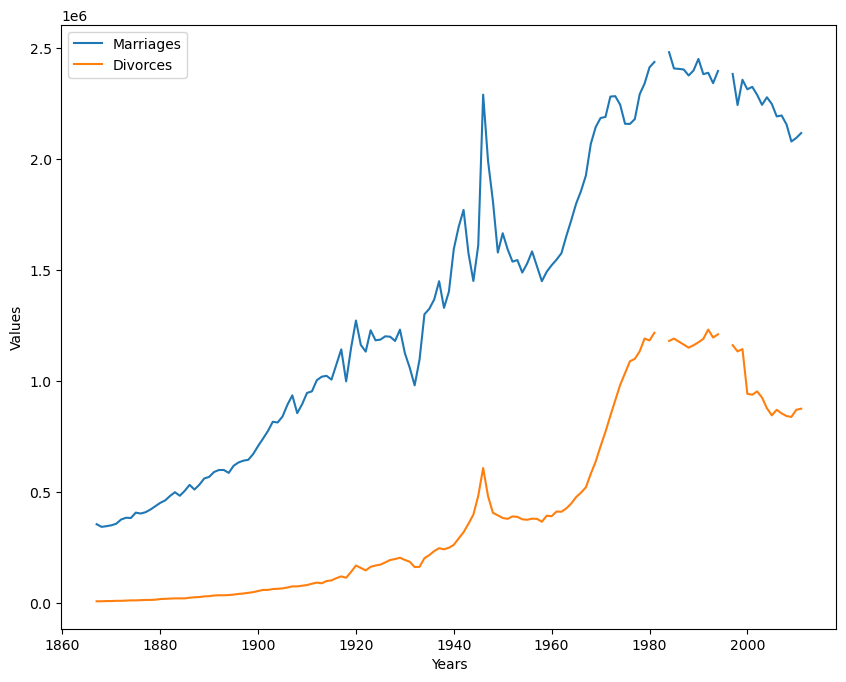

In [37]:
 # Libraries
import pandas as pd
import matplotlib.pyplot as plt
# libraries
import numpy as np
import matplotlib.pyplot as plt

 # Loading data
marr_data = pd.read_csv('us-marriages-divorces-1867-2014.csv')

#plotting
plt.figure()
marr_data.plot('Year',y=['Marriages','Divorces'])
plt.ylabel('Values')
plt.xlabel("Years")
plt.show()


# Question 7

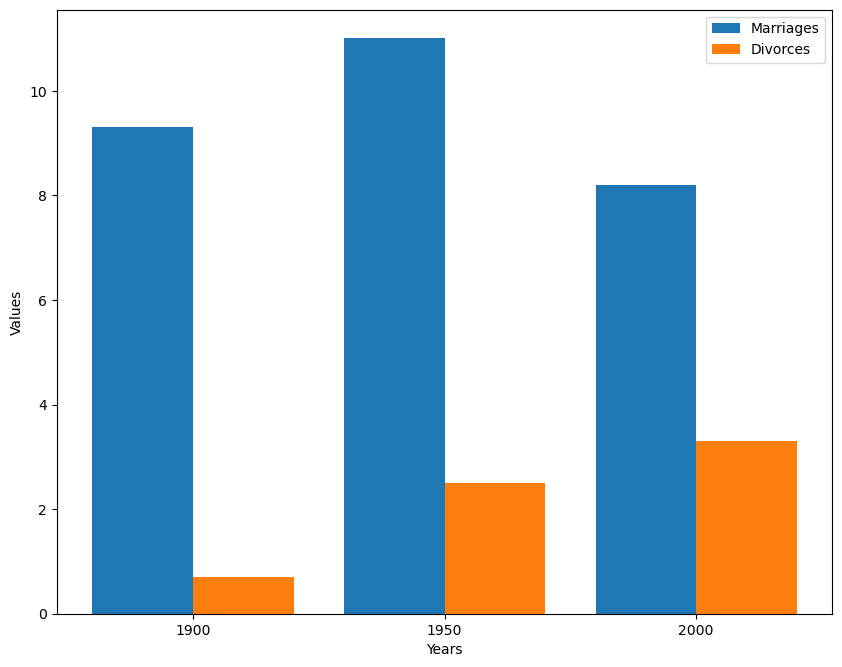

In [35]:
# libraries
import numpy as np
import matplotlib.pyplot as plt

 # Loading data
marr_data = pd.read_csv('us-marriages-divorces-1867-2014.csv')
data_3years = marr_data[marr_data['Year'].apply(lambda x: x in [1900, 1950, 2000])]
marriages = data_3years['Marriages_per_1000'].values
divorces = data_3years['Divorces_per_1000'].values
X = ['1900', '1950', '2000']
X_axis = np.arange(len(X))
plt.bar(X_axis - 0.2, marriages, 0.4, label = 'Marriages')
plt.bar(X_axis + 0.2, divorces, 0.4, label = 'Divorces')
plt.xticks(X_axis, X)
plt.xlabel("Years")
plt.ylabel("Values")
plt.legend()
 
# Show graph
plt.show()


# Question 8

In [32]:
# libraries
import numpy as np
import matplotlib.pyplot as plt

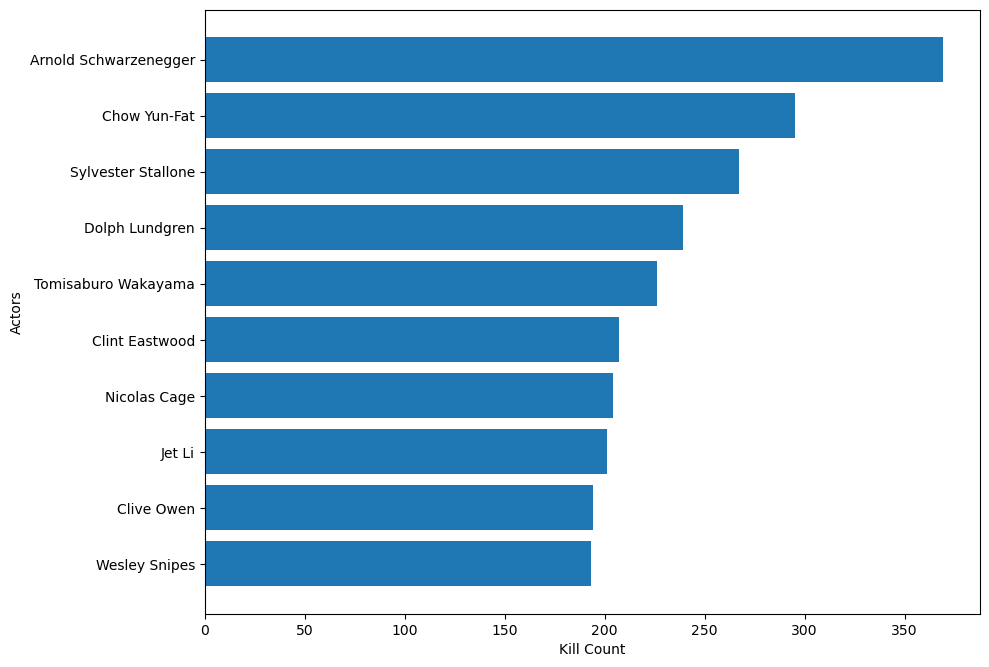

In [33]:
 # Loading data
actor_data = pd.read_csv('actor_kill_counts.csv')
actor_data = actor_data.sort_values('Count', ascending = True)
Names = actor_data['Actor'].values
kills = actor_data['Count'].values
plt.barh(Names, kills)
plt.ylabel("Actors")
plt.xlabel("Kill Count")
plt.show()


# Question 9

In [26]:
# libraries
import numpy as np
import matplotlib.pyplot as plt

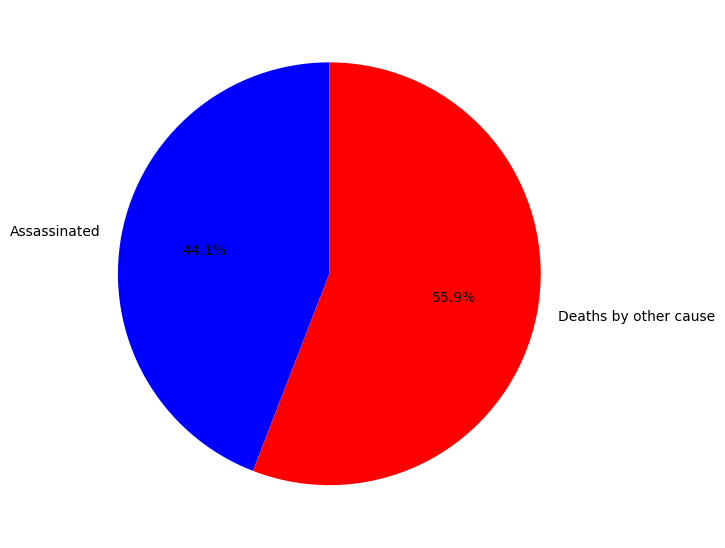

In [29]:
 # Loading data
roman_data = pd.read_csv('roman-emperor-reigns.csv')
assasinated = roman_data[roman_data['Cause_of_Death'].apply(lambda x: 'assassinated' in x.lower())]
chart = plt.figure(figsize =(10, 7))
colors=['blue', 'red']
plt.pie([len(assasinated),len(roman_data) - len(assasinated)], labels = ['Assassinated', 'Deaths by other cause'],  colors=colors, startangle=90, autopct='%1.1f%%')
 
# show plot
plt.show()

# Question 10

In [20]:
# libraries
import numpy as np
import matplotlib.pyplot as plt

In [22]:
 # Loading data
rev_data = pd.read_csv('arcade-revenue-vs-cs-doctorates.csv')
rev_data.head()

,Year,Total Arcade Revenue (billions),Computer Science Doctorates Awarded (US)
0,2000,1.196,861
1,2001,1.176,830
2,2002,1.269,809
3,2003,1.240,867
4,2004,1.307,948


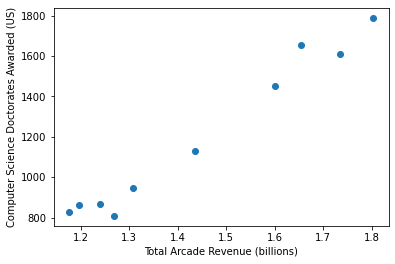

In [25]:
arcrev = rev_data['Total Arcade Revenue (billions)'].values
csdoc = rev_data['Computer Science Doctorates Awarded (US)'].values
plt.scatter(arcrev, csdoc)
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
plt.xlabel('Total Arcade Revenue (billions)')
plt.ylabel('Computer Science Doctorates Awarded (US)')
plt.show()